# Contributors :
### Devendra singh portey (A20538603)
### Haritha chennuru venugopal reddy (A20531012)
### Satya mani srujan dommeti(A20594429)
### Sivakrishna golla (A20563027)
### Sneha poojitha gade (A20558333)

#  Installing the dependencies

In [8]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pyfpgrowth

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


#  Data Preprocessing:


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into the variable `df`
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
df.head()

,YEAR,MO,DY,HR,TEMP,PRCP,HMDT,WND_SPD,ATM_PRESS,REF
0,2021,4,1,0,1.01,0.0,64.75,8.48,100.55,202104
1,2021,4,1,1,0.56,0.0,65.75,8.71,100.58,202104
2,2021,4,1,2,0.07,0.0,66.81,8.85,100.62,202104
3,2021,4,1,3,-0.64,0.0,68.44,8.82,100.68,202104
4,2021,4,1,4,-1.39,0.0,69.75,8.81,100.76,202104


### Explore dataset – correlation between features, their impact on target, independence assumptions


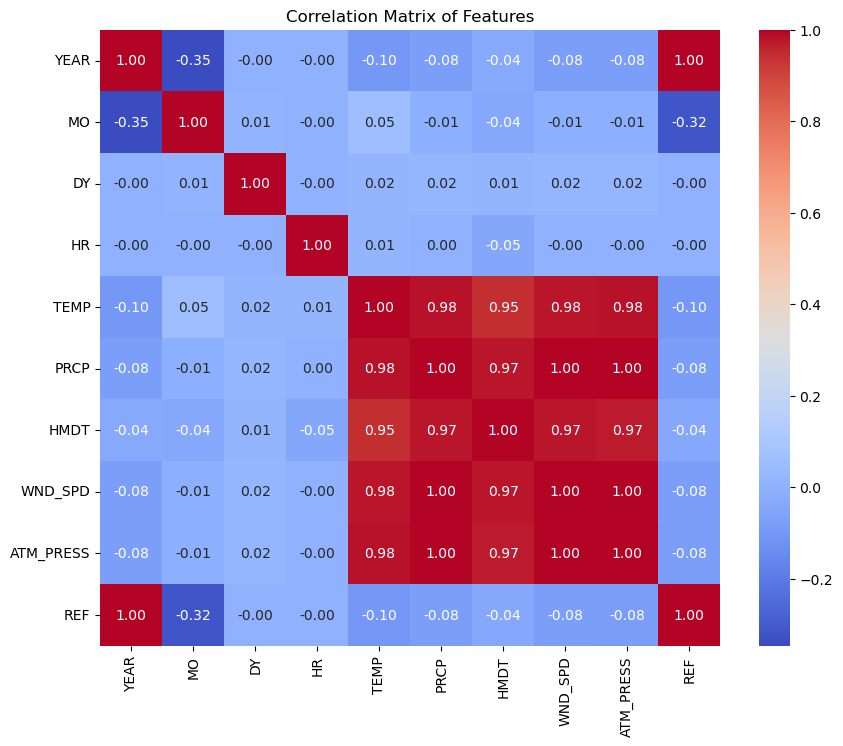

In [17]:
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

## Try multiple visualization strategies: correlation plots, dimensionality reduction approaches 
### Principal Component Analysis (PCA)

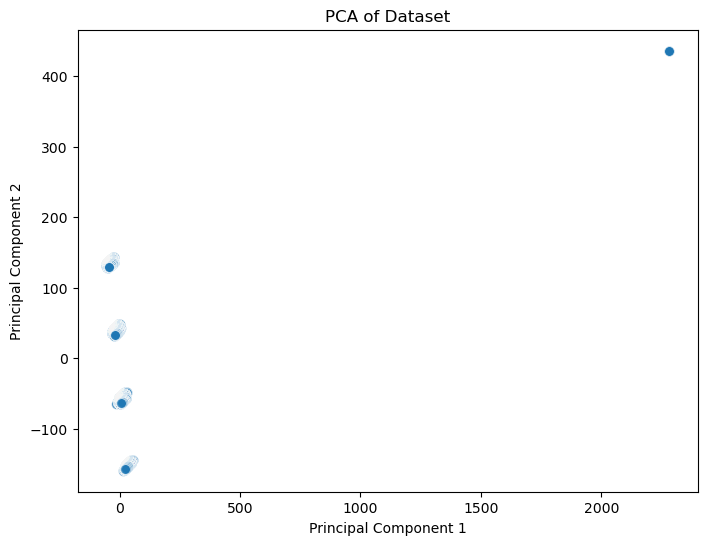

In [20]:
from sklearn.decomposition import PCA
import pandas as pd

# Select numeric features only for PCA
numeric_data = df.select_dtypes(include="number")

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data)

# Create a DataFrame with PCA results for easy plotting
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

# Plotting PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", data=pca_df, s=50, alpha=0.7)
plt.title("PCA of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### UMAP (Uniform Manifold Approximation and Projection)

C:\Users\HP\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


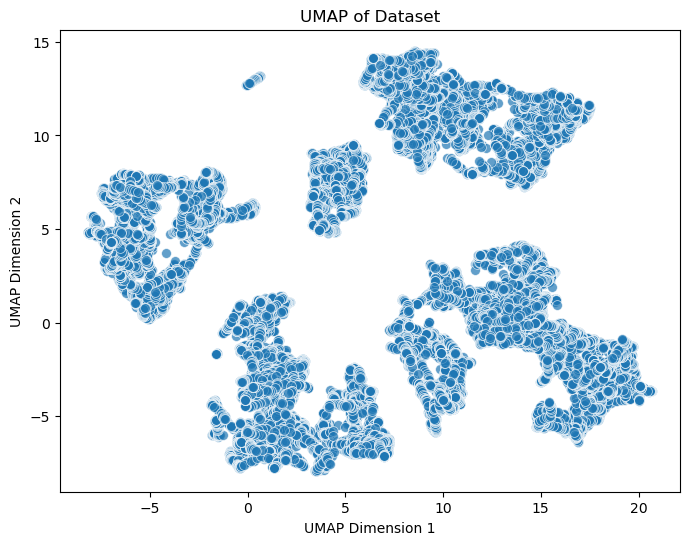

In [23]:
import umap

# Run UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(numeric_data)

# Create a DataFrame with UMAP results
umap_df = pd.DataFrame(data=umap_result, columns=["UMAP1", "UMAP2"])

# Plotting UMAP results
plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", data=umap_df, s=50, alpha=0.7)
plt.title("UMAP of Dataset")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

### t-SNE (t-distributed Stochastic Neighbor Embedding)

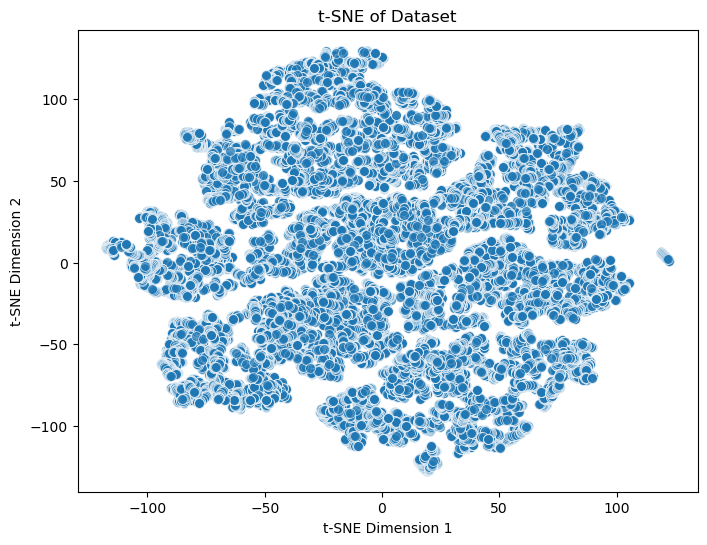

In [26]:
from sklearn.manifold import TSNE

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(numeric_data)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=["t-SNE1", "t-SNE2"])

# Plotting t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x="t-SNE1", y="t-SNE2", data=tsne_df, s=50, alpha=0.7)
plt.title("t-SNE of Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

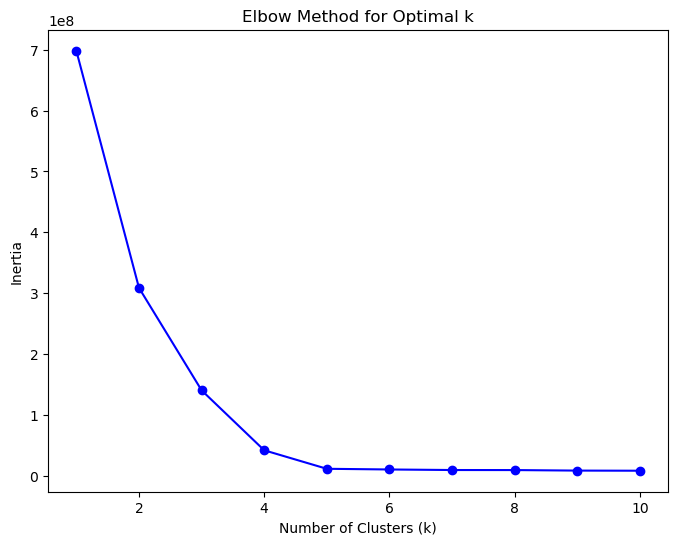

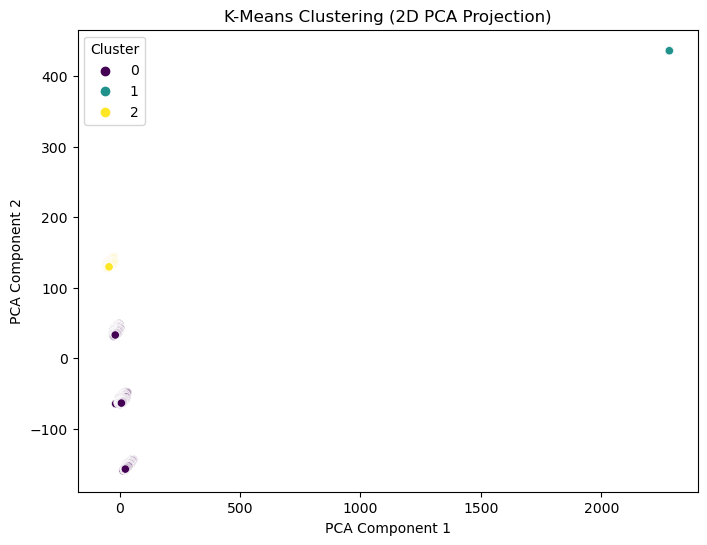

In [28]:
# K-Means Clustering

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Choosing optimal number of clusters using Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.select_dtypes(include="number"))
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Applying K-Means with an optimal k (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df.select_dtypes(include="number"))

# Plotting clusters using PCA for 2D visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.select_dtypes(include="number"))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['kmeans_cluster'], palette="viridis")
plt.title("K-Means Clustering (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

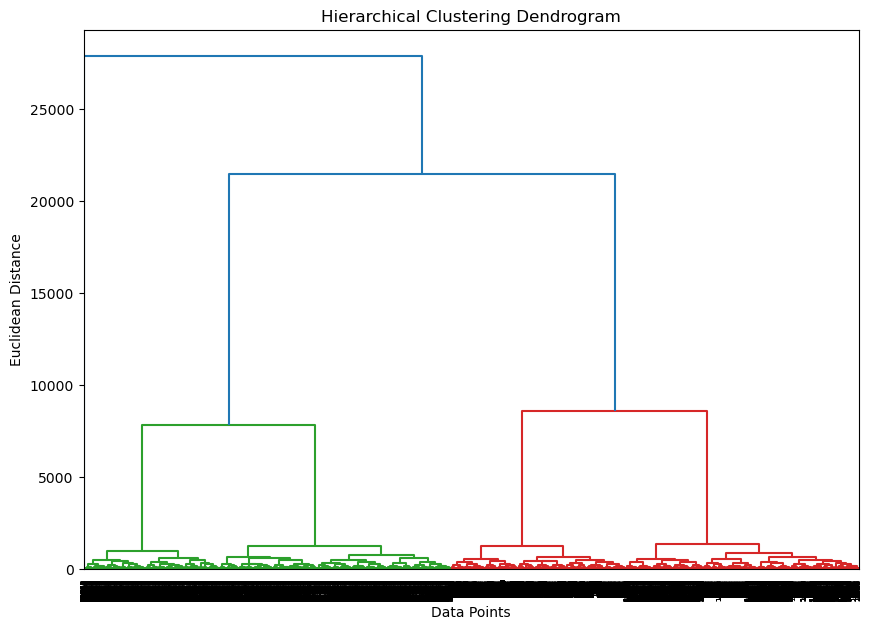

In [30]:
# Hierarchical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical clustering with Ward’s method
linked = linkage(df.select_dtypes(include="number"), method="ward")

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


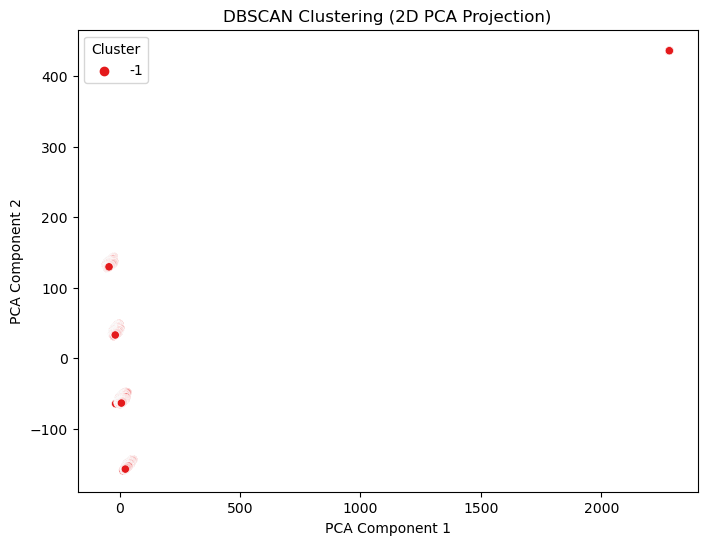

In [31]:
# DBSCAN Clustering

from sklearn.cluster import DBSCAN

# Running DBSCAN with example parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(df.select_dtypes(include="number"))

# Visualizing clusters with PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['dbscan_cluster'], palette="Set1")
plt.title("DBSCAN Clustering (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


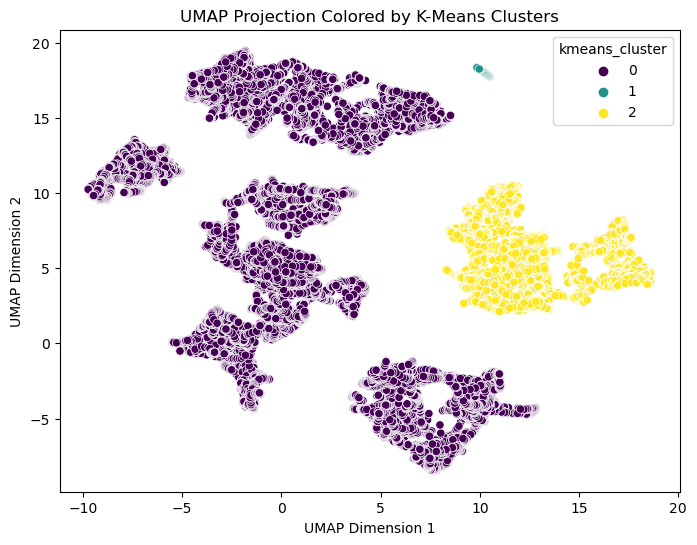

In [32]:
# Advanced Dimensionality Reduction with UMAP

import umap

# Running UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(df.select_dtypes(include="number"))

# Plotting UMAP results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=df['kmeans_cluster'], palette="viridis")
plt.title("UMAP Projection Colored by K-Means Clusters")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


# Unsupervised learning techniques

##### Anomaly Detection with Isolation Forest

   YEAR  MO  DY  HR  TEMP  PRCP   HMDT  WND_SPD  ATM_PRESS     REF
0  2021   4   1   0  1.01   0.0  64.75     8.48     100.55  202104
1  2021   4   1   1  0.56   0.0  65.75     8.71     100.58  202104
2  2021   4   1   2  0.07   0.0  66.81     8.85     100.62  202104
3  2021   4   1   3 -0.64   0.0  68.44     8.82     100.68  202104
4  2021   4   1   4 -1.39   0.0  69.75     8.81     100.76  202104


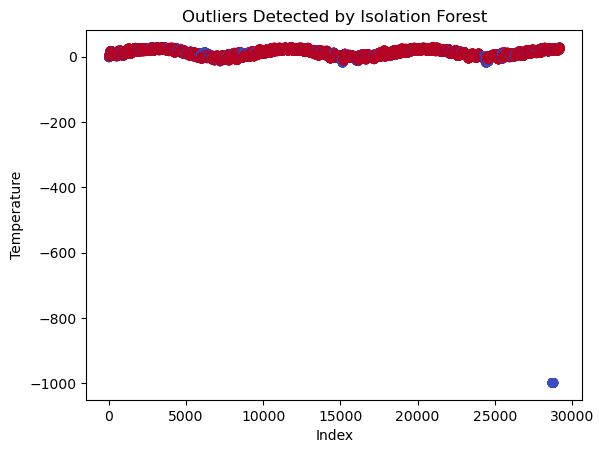

In [40]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data.csv')  # Adjust the filename if needed

# Ensure the data has loaded correctly
print(df.head())  # Optional: View the first few rows of the data

# Preprocess: Select only numeric features
numeric_data = df.select_dtypes(include="number")  # Select only numeric features

# Fit Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination level
outliers = iso_forest.fit_predict(numeric_data)

# Add outlier labels to the dataset
df['Outlier_IF'] = outliers

# Visualize the outliers by plotting one of the features, e.g., Temperature
plt.scatter(df.index, df['TEMP'], c=df['Outlier_IF'], cmap="coolwarm", label="Outliers (Red) and Normal (Blue)")
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.title("Outliers Detected by Isolation Forest")
plt.show()


##### Anomaly Detection with One-Class SVM

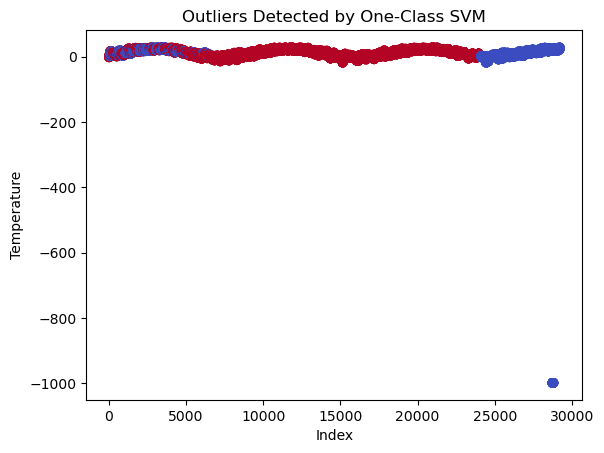

In [44]:
from sklearn.svm import OneClassSVM

# Fit One-Class SVM
oneclass_svm = OneClassSVM(nu=0.05, kernel="rbf", gamma="scale")  # Adjust nu for sensitivity to outliers
outliers_svm = oneclass_svm.fit_predict(numeric_data)

# Add One-Class SVM outlier labels to the dataset
df['Outlier_SVM'] = outliers_svm

# Visualize the outliers
plt.scatter(df.index, df['TEMP'], c=df['Outlier_SVM'], cmap="coolwarm", label="One-Class SVM Outliers")
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.title("Outliers Detected by One-Class SVM")
plt.show()


#####  Association Rule Learning with Apriori Algorithm

In [51]:
import pandas as pd
import pyfpgrowth

# Load the dataset
df = pd.read_csv('data.csv')

# Bin the numerical data into categories
df['TEMP_bin'] = pd.cut(df['TEMP'], bins=3, labels=["Low", "Medium", "High"])
df['PRCP_bin'] = pd.cut(df['PRCP'], bins=3, labels=["Low", "Medium", "High"])
df['HMDT_bin'] = pd.cut(df['HMDT'], bins=3, labels=["Low", "Medium", "High"])

# Prepare transactions format: each row as a list of items
transactions = df[['TEMP_bin', 'PRCP_bin', 'HMDT_bin']].apply(lambda row: list(row.dropna()), axis=1).tolist()

# Find frequent itemsets with a minimum support (e.g., 0.1)
min_support = int(0.1 * len(transactions))  # Convert support to an absolute count
patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support)

# Generate association rules with a minimum confidence (e.g., 0.7)
min_confidence = 0.7
rules = pyfpgrowth.generate_association_rules(patterns, min_confidence)

# Display results
print("Frequent Patterns:")
print(patterns)

print("\nAssociation Rules:")
for rule, outcome in rules.items():
    print(f"If {rule}, then {outcome[0]} with confidence of {outcome[1]}")

Frequent Patterns:
{('High',): 87444}

Association Rules:


#####  Feature Transformation with Autoencoders

Epoch 1/50
6/6 [==============================] - 0s 22ms/step - loss: 1.2643 - val_loss: 1.1219
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 1.2616 - val_loss: 1.1203
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 1.2591 - val_loss: 1.1188
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 1.2564 - val_loss: 1.1173
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 1.2539 - val_loss: 1.1158
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 1.2515 - val_loss: 1.1143
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 1.2490 - val_loss: 1.1128
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 1.2464 - val_loss: 1.1114
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 1.2440 - val_loss: 1.1100
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 1.2415 - val_loss: 1.1086
Epoch 11/50
6/6 [=====================

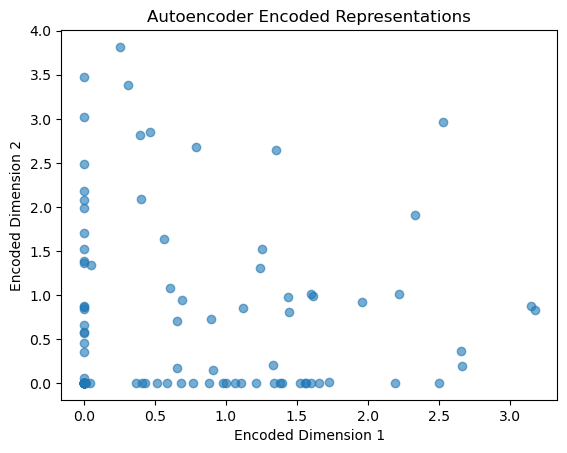

In [64]:

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

# Assuming `numeric_data` is your DataFrame or NumPy array with input features
numeric_data = np.random.rand(100, 10)  # Replace this line with your actual data

# Data Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Define the Autoencoder Model
input_dim = scaled_data.shape[1]
encoding_dim = 2  # Compressed feature space dimension for visualization

# Define the encoder part
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder part
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Combine encoder and decoder into an autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
# Fit the model to reconstruct `scaled_data` from itself
autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=16, shuffle=True, validation_split=0.1)

# Extract the Encoder Part for Visualization
# Here, we create a model with only the encoder layers
encoder = Model(inputs=input_layer, outputs=encoded)
encoded_data = encoder.predict(scaled_data)

# Visualization
# Convert the encoded data to a DataFrame for plotting
encoded_df = pd.DataFrame(encoded_data, columns=["Enc1", "Enc2"])

# Plot the encoded (compressed) data
plt.scatter(encoded_df["Enc1"], encoded_df["Enc2"], alpha=0.6)
plt.title("Autoencoder Encoded Representations")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()


##### Feature Transformation with Kernel PCA

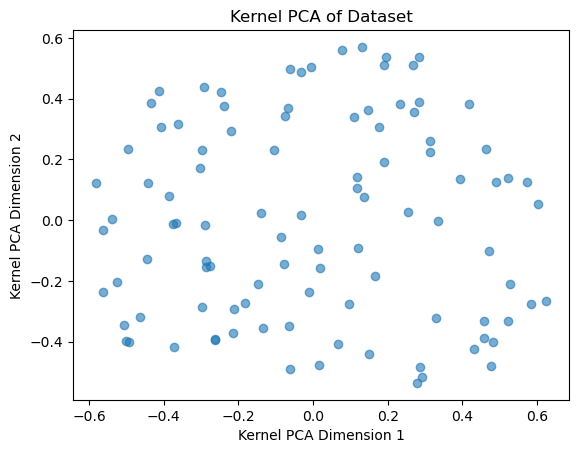

In [74]:

# import numpy as np
# import pandas as pd

# # Example data for illustration
# # Replace this with your actual data
# numeric_data = pd.DataFrame({
#     "Feature1": np.random.rand(100),
#     "Feature2": np.random.rand(100),
#     "Feature3": np.random.rand(100)
# })

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import pandas as pd
import matplotlib.pyplot as plt


# Sample data for illustration (Replace with actual data)
# numeric_data = pd.DataFrame(...)  # Define your data here if it's not done

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)  # Scale numeric_data to create scaled_data

# Perform Kernel PCA
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.1)
kpca_result = kpca.fit_transform(scaled_data)

# Convert to DataFrame for visualization
kpca_df = pd.DataFrame(kpca_result, columns=["KPCA1", "KPCA2"])

# Plot the Kernel PCA result
plt.scatter(kpca_df["KPCA1"], kpca_df["KPCA2"], alpha=0.6)
plt.title("Kernel PCA of Dataset")
plt.xlabel("Kernel PCA Dimension 1")
plt.ylabel("Kernel PCA Dimension 2")
plt.show()


# Identify appropriate cross-validation strategy


##### Stability-Based Cross-Validation for Dimensionality Reduction

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import adjusted_rand_score, silhouette_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('data.csv')
numeric_data = df.select_dtypes(include="number")

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

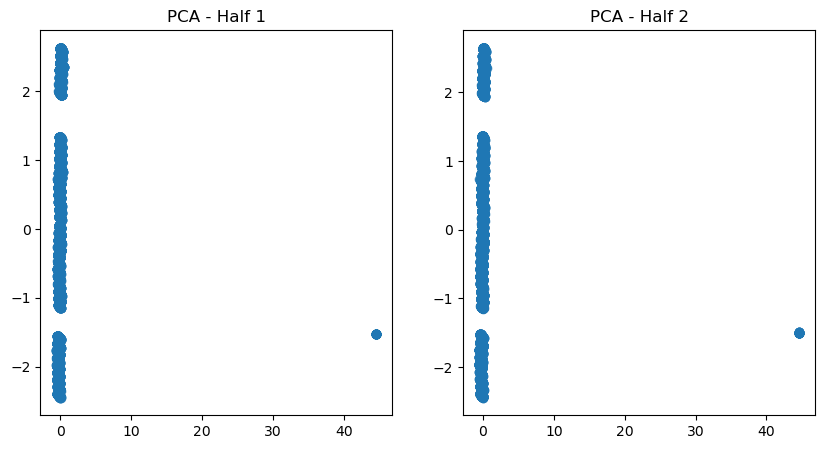

In [88]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Stability-Based Cross-Validation for Dimensionality Reduction

def stability_split_half_pca(data):
    # Split data into two halves
    data1, data2 = train_test_split(data, test_size=0.5, random_state=42)

    # Perform PCA on each half
    pca1 = PCA(n_components=2).fit_transform(data1)
    pca2 = PCA(n_components=2).fit_transform(data2)

    # Visualize for comparison
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(pca1[:, 0], pca1[:, 1], alpha=0.7)
    plt.title("PCA - Half 1")

    plt.subplot(1, 2, 2)
    plt.scatter(pca2[:, 0], pca2[:, 1], alpha=0.7)
    plt.title("PCA - Half 2")
    plt.show()

    # Procrustes or pairwise distance comparisons could be added for deeper validation

stability_split_half_pca(scaled_data)

##### Cluster Stability Validation

In [92]:
def cluster_stability_kmeans(data):
    scores = []
    # Perform clustering on multiple random splits
    for i in range(5):  # Number of cross-validation folds
        train, test = train_test_split(data, test_size=0.5, random_state=i)
        
        # Fit K-Means on train data
        kmeans = KMeans(n_clusters=3, random_state=42).fit(train)
        labels_train = kmeans.predict(train)
        labels_test = kmeans.predict(test)
        
        # Calculate stability using Adjusted Rand Index (ARI) on test vs train predictions
        score = adjusted_rand_score(labels_train[:len(labels_test)], labels_test)
        scores.append(score)
        print(f"Fold {i+1}, Adjusted Rand Index: {score:.2f}")

    print(f"Mean ARI: {np.mean(scores):.2f}")

cluster_stability_kmeans(scaled_data)

Fold 1, Adjusted Rand Index: 0.00
Fold 2, Adjusted Rand Index: -0.00
Fold 3, Adjusted Rand Index: -0.00
Fold 4, Adjusted Rand Index: -0.00
Fold 5, Adjusted Rand Index: -0.00
Mean ARI: -0.00


#####  Anomaly Detection Cross-Validation

In [94]:
def anomaly_stability_isolation_forest(data):
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    train, test = train_test_split(data, test_size=0.5, random_state=42)
    
    # Fit on train, predict on test
    iso_forest.fit(train)
    outliers_test = iso_forest.predict(test)
    
    print("Anomalies detected in test set:", sum(outliers_test == -1))

anomaly_stability_isolation_forest(scaled_data)

Anomalies detected in test set: 736


##### Cross-Validation of Association Rule Learning

In [100]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split

# Load your dataset (make sure to replace with your actual file path)
df = pd.read_csv('data.csv')  # Ensure this path is correct

# Bin your numeric columns to use with Apriori
df['TEMP_bin'] = pd.cut(df['TEMP'], bins=3, labels=["Low", "Medium", "High"])
df['PRCP_bin'] = pd.cut(df['PRCP'], bins=3, labels=["Low", "Medium", "High"])
df['HMDT_bin'] = pd.cut(df['HMDT'], bins=3, labels=["Low", "Medium", "High"])

# One-hot encoding the DataFrame and ensure boolean type
one_hot_df = pd.get_dummies(df[['TEMP_bin', 'PRCP_bin', 'HMDT_bin']])
one_hot_df = one_hot_df.astype(bool)  # Ensure it's in boolean format (True/False)

# Split data into training and test sets
train, test = train_test_split(one_hot_df, test_size=0.5, random_state=42)

# Generate frequent itemsets from the training data using Apriori
frequent_itemsets_train = apriori(train, min_support=0.1, use_colnames=True)

# Generate association rules from the frequent itemsets
# Adding 'num_itemsets' argument here
rules_train = association_rules(frequent_itemsets_train, metric="lift", min_threshold=1.0, num_itemsets=None)

# Display association rules from the training set
print("Association rules from the training set:")
print(rules_train[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Now, we can perform the validation of rules on the test set
def association_rule_validation(df):
    # Create training and test sets
    train, test = train_test_split(df, test_size=0.5, random_state=42)

    # Generate frequent itemsets from the training data
    frequent_itemsets_train = apriori(train, min_support=0.1, use_colnames=True)

    # Generate association rules from the frequent itemsets
    rules_train = association_rules(frequent_itemsets_train, metric="lift", min_threshold=1.0, num_itemsets=None)

    print("Association rules from the training set:")
    print(rules_train[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

    # You can perform further validation by testing on the test set
    frequent_itemsets_test = apriori(test, min_support=0.1, use_colnames=True)
    rules_test = association_rules(frequent_itemsets_test, metric="lift", min_threshold=1.0, num_itemsets=None)

    print("\nAssociation rules from the test set:")
    print(rules_test[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Run the function with your DataFrame
association_rule_validation(one_hot_df)


Association rules from the training set:
                       antecedents                     consequents   support  \
0                  (TEMP_bin_High)                 (PRCP_bin_High)  0.997536   
1                  (PRCP_bin_High)                 (TEMP_bin_High)  0.997536   
2                  (TEMP_bin_High)                 (HMDT_bin_High)  0.997536   
3                  (HMDT_bin_High)                 (TEMP_bin_High)  0.997536   
4                  (PRCP_bin_High)                 (HMDT_bin_High)  0.997536   
5                  (HMDT_bin_High)                 (PRCP_bin_High)  0.997536   
6   (TEMP_bin_High, PRCP_bin_High)                 (HMDT_bin_High)  0.997536   
7   (TEMP_bin_High, HMDT_bin_High)                 (PRCP_bin_High)  0.997536   
8   (PRCP_bin_High, HMDT_bin_High)                 (TEMP_bin_High)  0.997536   
9                  (TEMP_bin_High)  (PRCP_bin_High, HMDT_bin_High)  0.997536   
10                 (PRCP_bin_High)  (TEMP_bin_High, HMDT_bin_High)  0.997536   

#### Using validation set for hyperparameter,Identify potential pitfalls and using cross-validation analyzing its performance

In [111]:

# 1. Load the dataset (using Iris dataset for simplicity)
data = load_iris()
X = data.data
y = data.target

# 2. Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Standardize the data (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 4. Train a simple Logistic Regression model
model = LogisticRegression(max_iter=200)

# 5. Hyperparameter tuning using GridSearchCV on the validation set
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength hyperparameter
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from the validation set
print("Best hyperparameters:", grid_search.best_params_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# 6. Evaluate the model performance using cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

# 7. Evaluate on the test set
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy}")



Best hyperparameters: {'C': 10}
Cross-validation scores: [1.         0.72222222 0.94444444 1.         0.94444444]
Mean cross-validation score: 0.9222222222222223
Test accuracy: 0.9666666666666667


# Identify potential pitfalls:
#####  - Overfitting: If cross-validation scores are much higher than test accuracy, it indicates overfitting.
#####  - Underfitting: If cross-validation scores are low, it indicates underfitting.
#####  - Hyperparameter tuning: The performance depends on the proper choice of hyperparameters.
#####  - Early Stopping: Although not necessary for Logistic Regression, it’s useful in deep learning models.


## Propose ways to improve performance

####  Experiment 1: Feature Selection and Regularization with Logistic Regression (L1 + L2)

In [127]:
# L1 Regularization (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=200)
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=200)

# Feature selection using Recursive Feature Elimination (RFE)
selector = RFE(model_l2, n_features_to_select=3)  # Select top 3 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Cross-validation score for L1 and L2 regularization with feature selection
cv_score_l1 = cross_val_score(model_l1, X_train_selected, y_train, cv=5, scoring='accuracy')
cv_score_l2 = cross_val_score(model_l2, X_train_selected, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores (L1 regularization with feature selection): {cv_score_l1}")
print(f"Cross-validation scores (L2 regularization with feature selection): {cv_score_l2}")
print(f"Mean CV score (L1): {cv_score_l1.mean()}")
print(f"Mean CV score (L2): {cv_score_l2.mean()}")


Cross-validation scores (L1 regularization with feature selection): [1.         0.77777778 1.         1.         0.94444444]
Cross-validation scores (L2 regularization with feature selection): [1.         0.72222222 1.         0.94444444 0.94444444]
Mean CV score (L1): 0.9444444444444444
Mean CV score (L2): 0.9222222222222223


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Experiment 2: Increasing Model Complexity with Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Experiment 2: Increasing model complexity with Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 10],         # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

# Best hyperparameters from GridSearch
print(f"Best parameters from GridSearch (Random Forest): {grid_search_rf.best_params_}")

# Evaluate on the validation set with the best parameters
best_rf_model = grid_search_rf.best_estimator_
cv_scores_rf = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores (Random Forest): {cv_scores_rf}")
print(f"Mean cross-validation score (Random Forest): {cv_scores_rf.mean()}")


Best parameters from GridSearch (Random Forest): {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Cross-validation scores (Random Forest): [1.         0.72222222 1.         1.         0.94444444]
Mean cross-validation score (Random Forest): 0.9333333333333333


#### Experiment 3: Ensemble Method – Stacking

In [134]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Experiment 3: Ensemble Method - Stacking
estimators = [
    ('lr', LogisticRegression(max_iter=200)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', random_state=42))
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Cross-validation score for Stacking Model
cv_scores_stacking = cross_val_score(stacking_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores (Stacking): {cv_scores_stacking}")
print(f"Mean cross-validation score (Stacking): {cv_scores_stacking.mean()}")


Cross-validation scores (Stacking): [1.         0.72222222 0.94444444 1.         0.94444444]
Mean cross-validation score (Stacking): 0.9222222222222223
